In [1]:
# CONTAINS ALL NECESSARY FUNCTIONALITY FOR THIS EXERCISE:
from Modules import OIP20_lib_ImageProcessing_V7_16bit as ip  
# (for this to work, you need:
#  * a subfolder named "Modules" in your Notebook folder
#  * in this subdfolder you need an empty file named "__init__.py"
#  * and of course the library (.py file) named "OIP20_lib_ImageProcessing_V1.py")

# if you want to use other functionality here, you need to load the libraries again: 
import matplotlib.pyplot as plt # We need this here only for closing the open windows
import numpy as np # we want to use some math...
from Modules import tictoc as t

# for nice(r) potting in the notebook
%matplotlib inline 

##  If not in Jupyter: close all open plots (otherwise you will get tons of them after some time...)
# plt.close("all")

# Some house holding: 
#  Higher resolution for figures:
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# for interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
particles_frequency_001 = np.load('./images/dataset/001_particles.npy')
diameter_frequency_001 = np.load('./images/dataset/001_diameter.npy')

In [3]:
particles_frequency_006 = np.load('./images/dataset/006_particles.npy')
diameter_frequency_006 = np.load('./images/dataset/006_diameter.npy')

In [4]:
particles_frequency = np.concatenate((particles_frequency_001,particles_frequency_006))
diameter_frequency = np.concatenate((diameter_frequency_001,diameter_frequency_006))

In [5]:
from matplotlib.ticker import MaxNLocator

def plot_result(result, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel, color='tab:blue')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].axvline(np.mean(result), color='k', linestyle='--', linewidth=3)
    ax[0].axvline(np.median(result), color='b', linestyle='-', linewidth=3)
    ax[0].text(np.mean(result), np.amax(result), 'Mean: {:.2f}'.format(np.mean(result)))
    ax[0].text(np.median(result), np.amax(result)*0.8, 'Median: {:.2f}'.format(np.median(result)))
    
    counts, bins = np.histogram(result)
    print(bins[:-1])
    ax[0].hist(bins[:-1], bins, weights=counts)
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel, color='tab:blue')
    ax[1].boxplot(result, vert=False)
    
    ax[2].set_xlabel(xlabel)
    ax[2].set_ylabel(ylabel, color='tab:blue')
    ax[2].violinplot(result, vert=False)
    plt.show() 

[ 0.   1.7  3.4  5.1  6.8  8.5 10.2 11.9 13.6 15.3]


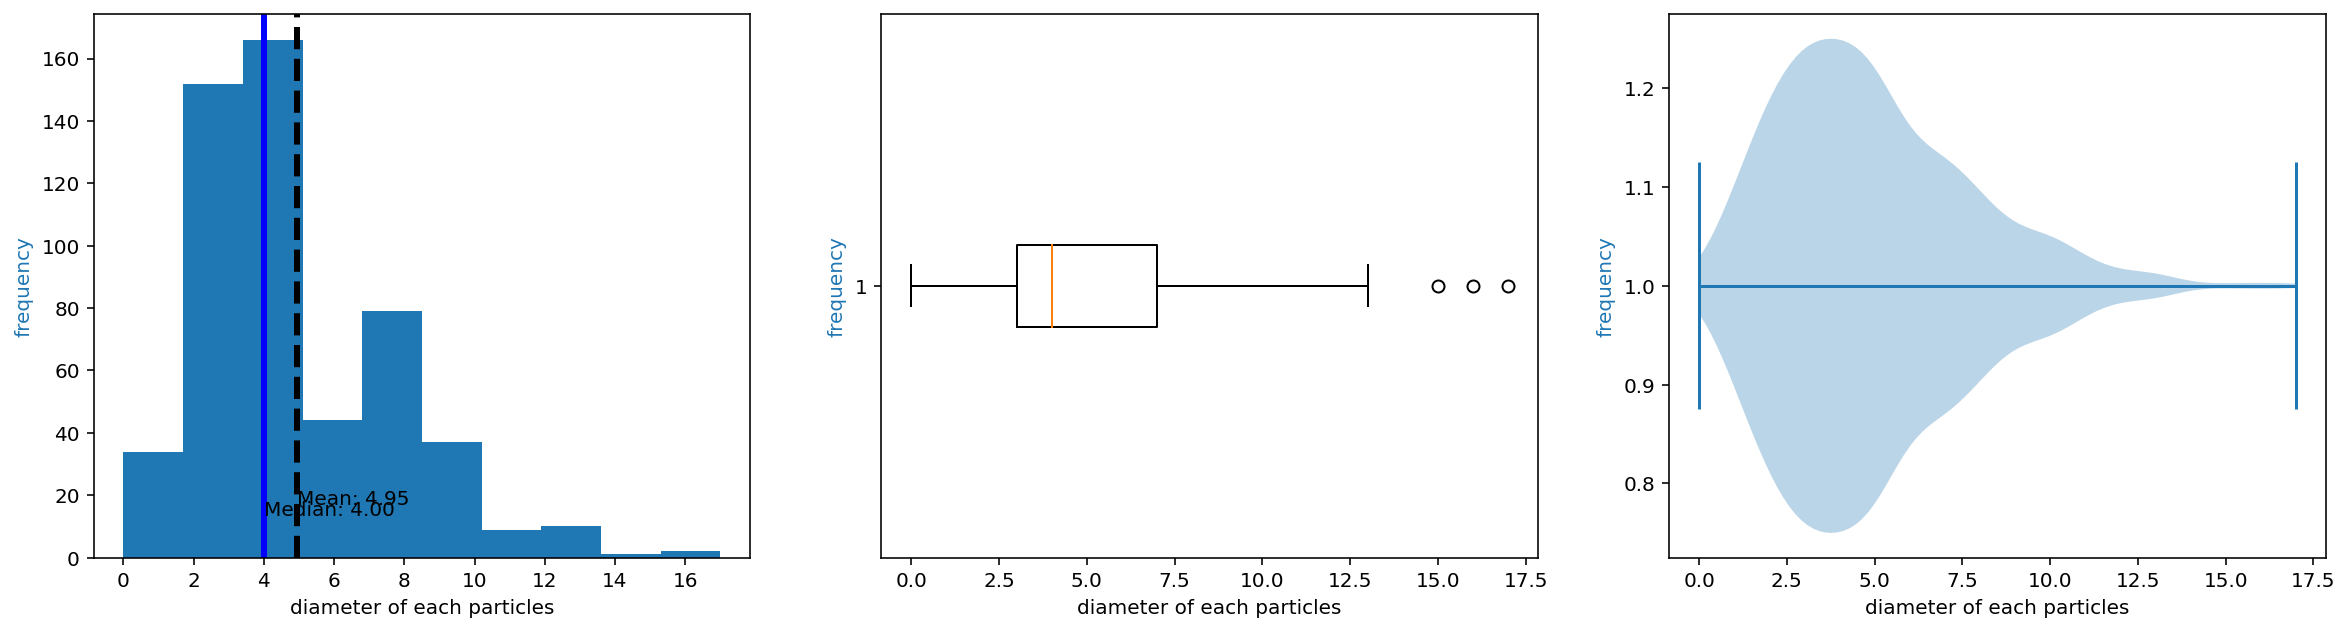

In [6]:
plot_result(particles_frequency, xlabel='diameter of each particles', ylabel='frequency')

[  4.88997555  27.38386308  49.87775061  72.37163814  94.86552567
 117.3594132  139.85330073 162.34718826 184.84107579 207.33496333]


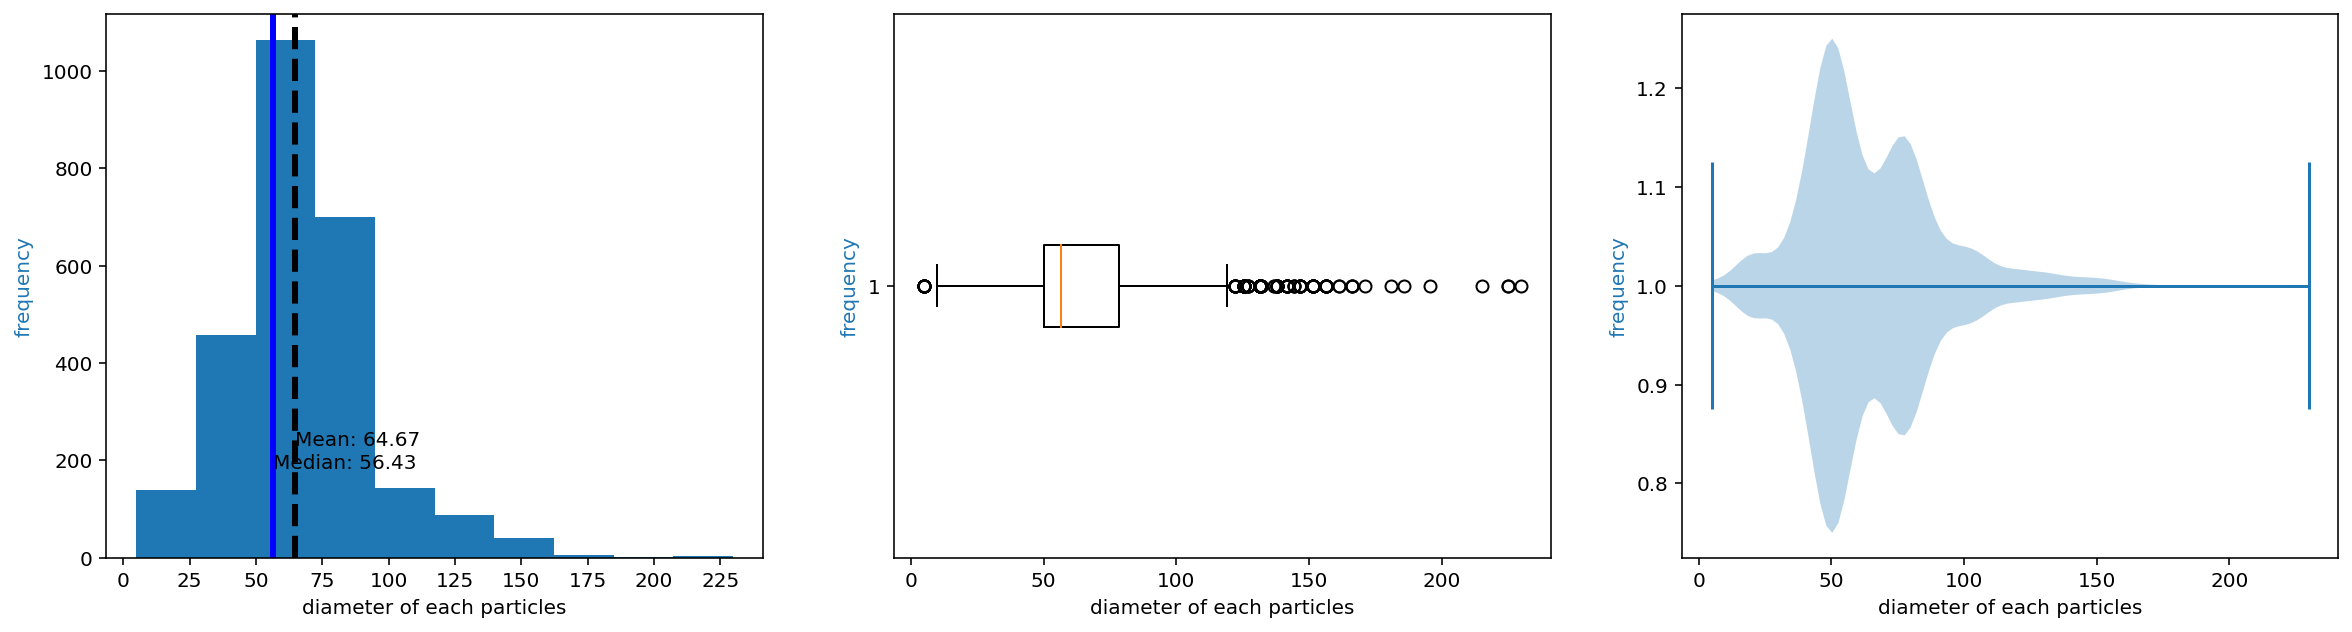

In [7]:
plot_result(diameter_frequency, xlabel='diameter of each particles', ylabel='frequency')

In [8]:
def statistic(result):
#     print(result)
    print(np.mean(result)) # sum of all the entries divided by the number of entries / the average value 
    print(np.median(result)) # the middle point of the number of entries
    print(np.var(result)) # measures how far a set of numbers is spread out from their average value
    print(np.std(result)) # a measure of the amount of variation or dispersion of a set of values.

In [9]:
statistic(particles_frequency)

4.949438202247191
4.0
7.75212515254808
2.784263843917828


In [10]:
statistic(diameter_frequency)

64.6696869704177
56.426332288401255
724.4480997200399
26.915573553614642
